# Riiid Project: Minimally Viable Product (MVP)  
***

# Table of Contents <a id='toc'></a>
### 1. [Acquire](#acquire)
### 2. [Prepare](#prepare)
### 3. [Explore](#explore)
### 4. [Modeling](#modeling)
### 5. [Conclusions](#conclusions)

## About Riiid Labs

Riiid Labs, an AI solutions provider delivering creative disruption to the education market. With a strong belief in equal opportunity in education, Riiid launched an AI tutor based on deep-learning algorithms in 2017 that attracted more than one million South Korean students. This year, the company released EdNet, the world’s largest open database for AI education containing more than 100 million student interactions. [Source](https://www.kaggle.com/c/riiid-test-answer-prediction/overview/description)

## Our Goal

The goal of this project is to create a machine learning model that can predict whether or not a user will answer a problem correctly using data from Riiid's EdNet Database. 

# Imports

In [1]:
# General Imports 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

# Train Validate Test
from sklearn.model_selection import train_test_split

# Modeling Imports
from sklearn.cluster import KMeans

# Acquire and Prepare Files
import acquire, prepare, explore, model
from explore import rfe_ranker

# Sklearn 
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

# Warnings 
import warnings
warnings.filterwarnings("ignore")

# 1. Acquire<a id='acquire'></a>
Acqure the data used for this project. 

[Return to Top](#toc)
***

In [2]:
# Reading in data from local files
df_train = pd.read_csv('train.csv')
df_validate = pd.read_csv('validate.csv')
df_test = pd.read_csv('test.csv')

df_train.shape, df_validate.shape, df_test.shape

((411517, 18), (50842, 18), (52868, 18))

In [3]:
# Train Data
df_train.head(2)

,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,lecture_id,tag,lecture_part,type_of,question_id,bundle_id,correct_answer,question_part,tags
0,0,1864702,5720,0,0,1,1,NaN,NaN,NaN,NaN,NaN,NaN,5720.0,5720.0,1.0,5.0,115
1,45951,1864702,5204,0,1,1,0,inf,False,NaN,NaN,NaN,NaN,5204.0,5204.0,3.0,5.0,173


In [4]:
# Validate Data
df_validate.head(2)

,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,lecture_id,tag,lecture_part,type_of,question_id,bundle_id,correct_answer,question_part,tags
0,15625124241,1864702,3209,0,2152,3,1,34660.0,True,NaN,NaN,NaN,NaN,3209.0,3207.0,3.0,4.0,157 169 162 38
1,15625124241,1864702,3208,0,2152,3,1,34660.0,True,NaN,NaN,NaN,NaN,3208.0,3207.0,3.0,4.0,113 169 162 38


In [5]:
# Test Data
df_test.head(2)

,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,lecture_id,tag,lecture_part,type_of,question_id,bundle_id,correct_answer,question_part,tags
0,20170378604,1864702,8811,0,2494,1,1,3000.0,True,NaN,NaN,NaN,NaN,8811.0,8811.0,1.0,5.0,45
1,20170394313,1864702,8643,0,2495,3,1,4000.0,True,NaN,NaN,NaN,NaN,8643.0,8643.0,3.0,5.0,15


### Acquire Takeaways
- Data initially acquired from Kaggle and saved as local files, lectures.csv, questions.csv, and train.csv.
- Imported data from saved local files. 
- We used a random sample of 100K users for our analysis. 

# 2. Prepare<a id='prepare'></a>
Preparing the data for future exploration and modeling.

[Return to Top](#toc)
***

### Run Prepare Function (found in prepare.py module)

In [6]:
# Produce train/validate/test
# Produce scaled train/validate/test
train, validate, test, train_s, validate_s, test_s = prepare.prep_riiid(df_train, df_validate, df_test)

In [7]:
# Print the shape of train
print(train.shape)

# Display first 5 rows of train
train.head()

(403377, 8)


,answered_correctly,question_had_explanation,user_acc_mean,user_lectures_running_total,q_time,avg_user_q_time,mean_content_accuracy,mean_task_accuracy
0,1,0,0.630049,0,45951.0,11917302.0,0.818182,0.682248
1,0,0,0.630049,0,28391.0,11917302.0,0.550000,0.534988
2,1,0,0.630049,0,22436.0,11917302.0,0.444444,0.445216
3,1,0,0.630049,0,36191.0,11917302.0,0.406250,0.544008
4,0,0,0.630049,0,24322.0,11917302.0,0.687500,0.485282


In [8]:
# Print the shape of train scaled
print(train_s.shape)

# Display first 5 rows of train scaled 
train_s.head()

(403377, 7)


,answered_correctly,question_had_explanation,user_acc_mean,mean_content_accuracy,mean_task_accuracy,user_lectures_running_total_scaled,avg_user_q_time_scaled
0,1,0,0.630049,0.818182,0.682248,0.0,0.001202
1,0,0,0.630049,0.550000,0.534988,0.0,0.001202
2,1,0,0.630049,0.444444,0.445216,0.0,0.001202
3,1,0,0.630049,0.406250,0.544008,0.0,0.001202
4,0,0,0.630049,0.687500,0.485282,0.0,0.001202


In [9]:
# Print the shape of validate 
print(validate.shape)

# Display first 5 rows of validate
validate.head()

(49945, 7)


,answered_correctly,question_had_explanation,user_acc_mean,user_lectures_running_total,avg_user_q_time,mean_content_accuracy,mean_task_accuracy
0,1,1,0.630049,0,11917302.0,0.604167,0.478261
1,1,1,0.630049,0,11917302.0,0.708333,0.478261
2,1,1,0.630049,0,11917302.0,0.687500,0.478261
3,1,1,0.630049,0,11917302.0,0.735294,0.619048
4,1,1,0.630049,0,11917302.0,0.852941,0.619048


In [10]:
# Print the shape of validate scaled 
print(validate_s.shape)

# Display first 5 rows of validate scaled 
validate_s.head()

(49945, 7)


,answered_correctly,question_had_explanation,user_acc_mean,mean_content_accuracy,mean_task_accuracy,user_lectures_running_total_scaled,avg_user_q_time_scaled
0,1,1,0.630049,0.604167,0.478261,0.0,0.001202
1,1,1,0.630049,0.708333,0.478261,0.0,0.001202
2,1,1,0.630049,0.687500,0.478261,0.0,0.001202
3,1,1,0.630049,0.735294,0.619048,0.0,0.001202
4,1,1,0.630049,0.852941,0.619048,0.0,0.001202


In [11]:
# Print the shape of test
print(test.shape)

# Display first 5 rows of test
test.head()

(51971, 7)


,answered_correctly,question_had_explanation,user_acc_mean,user_lectures_running_total,avg_user_q_time,mean_content_accuracy,mean_task_accuracy
0,1,1,0.630049,0,11917302.0,0.468750,0.529412
1,1,1,0.630049,0,11917302.0,0.290323,0.578947
2,0,1,0.630049,0,11917302.0,0.387755,0.588235
3,1,1,0.630049,0,11917302.0,0.740741,0.714286
4,0,1,0.630049,0,11917302.0,0.428571,0.687500


In [12]:
# Print the shape of test scaled
print(test_s.shape)

# Display first 5 rows of test scaled
test_s.head()

(51971, 7)


,answered_correctly,question_had_explanation,user_acc_mean,mean_content_accuracy,mean_task_accuracy,user_lectures_running_total_scaled,avg_user_q_time_scaled
0,1,1,0.630049,0.468750,0.529412,0.0,0.001202
1,1,1,0.630049,0.290323,0.578947,0.0,0.001202
2,0,1,0.630049,0.387755,0.588235,0.0,0.001202
3,1,1,0.630049,0.740741,0.714286,0.0,0.001202
4,0,1,0.630049,0.428571,0.687500,0.0,0.001202


### Prepare Takeaways
Used __prep_riiid__ function from __prepare.py__ to make the following changes:
- Filled missing boolean values in question_had_explanation with False. Missing values indicated that the question did not have an explanation or the user viewed a lecture.
- Filled missing values in prior_question_elapsed_time with 0. Missing values indicated that a user viewed a lecture before answering the first question in a bundle.
- Dropped columns: lecture_id, tag, lecture_part, type_of, question_id, bundle_id, correct_answer, question_part, and tags
- Dropped rows that represent lectures
- Converted null and inf values to 0's
- Converted True and False values to 1's and 0's respectively
- Created scaled versions of the train, validate and test sets 

<b>Feature Engineering: (all in prepare.py file)</b> 
- Added column, user_lectures_running_total, that keeps running total of number of lectures viewed by user
- Added column, user_acc_mean, that reflects the avg accuracy of a user on all questions they answered	
- Added column, mean_content_accuracy, that reflects avg accuracy of all users answering a particular question
- Added column, mean_task_accuracy, that reflects avg accuracy of all users answering a particular group of questions
- Added column to train, q_time, that reflects the amount of milliseconds it took the user to answer the current question

# 3. Explore<a id='explore'></a>
Plotted graphs, ran feature selection, and performed hypothesis testing in order to discover drivers of 'answered_correctly'.

[Return to Top](#toc)
***

In [13]:
# Check data types and null value counts
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 403377 entries, 0 to 403376
Data columns (total 8 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   answered_correctly           403377 non-null  int64  
 1   question_had_explanation     403377 non-null  int64  
 2   user_acc_mean                403377 non-null  float64
 3   user_lectures_running_total  403377 non-null  int64  
 4   q_time                       403377 non-null  float64
 5   avg_user_q_time              403377 non-null  float64
 6   mean_content_accuracy        403377 non-null  float64
 7   mean_task_accuracy           403377 non-null  float64
dtypes: float64(5), int64(3)
memory usage: 27.7 MB


In [14]:
# Checking # of unique values in int64 data type columns
for col in train:
    if train[col].dtypes == 'int64': 
        print(f'{col} has {train[col].nunique()} unique values.')

answered_correctly has 2 unique values.
question_had_explanation has 2 unique values.
user_lectures_running_total has 249 unique values.


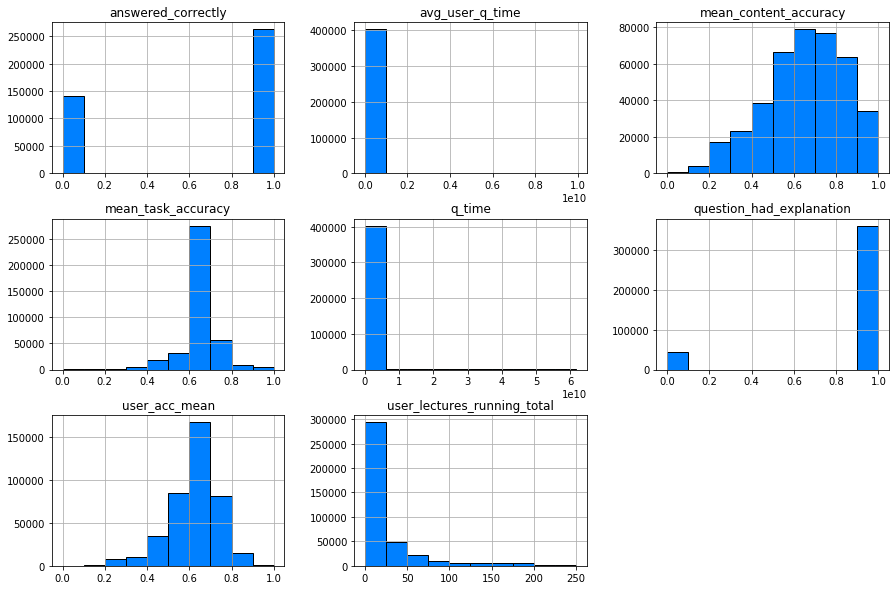

In [15]:
# Plot distribution of all train columns 
train.hist(figsize=(15, 10),
        grid=True, color='#0080ff', ec='black') 
plt.show()

- Plotting all variables to get a general view of their distributions  

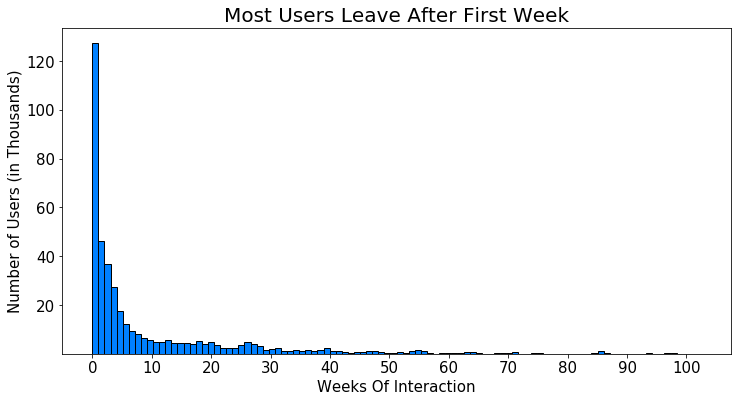

In [16]:
# User_id vs Timestamp
# Had to convert time from in milliseconds to weeks
ts = df_train['timestamp']/(31536000000/52)
fig = plt.figure(figsize=(12,6))
ts.plot.hist(bins=100, color='#0080ff', ec='black') 
plt.title("Most Users Leave After First Week", fontsize=20)
plt.xlabel("Weeks Of Interaction", fontsize=15)
plt.ylabel("Number of Users (in Thousands)", fontsize=15)
plt.xticks(np.linspace(0,100,11),rotation=0, fontsize=15)
plt.yticks([20000,40000,60000,80000,100000,120000],labels=['20','40','60','80','100','120'], rotation=0, fontsize=15)
plt.show() 

- Most users stop using the platform after the first week.
- The rest of users stop using the platform after ten weeks.
- This shows us who are our users and platform usage behavior. 

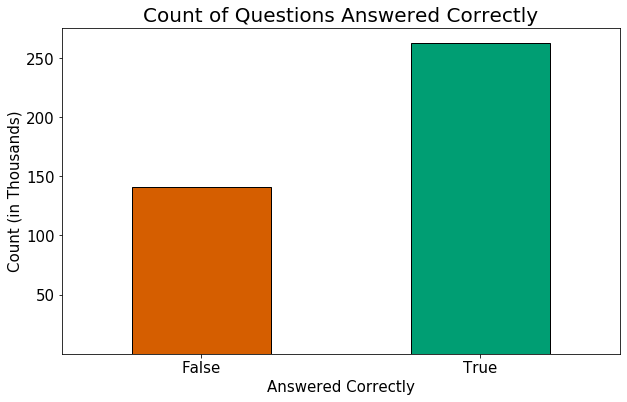

In [17]:
# Count of Questions Answered Correct
plt.figure(figsize=(10,6))
train.answered_correctly.value_counts().sort_index().plot.bar(grid=True, color=['#d55e00', '#009e73'], ec='black')
answer_correctly = train.answered_correctly.mean()
plt.title("Count of Questions Answered Correctly",fontsize=20) 
plt.xlabel('Answered Correctly',fontsize=15)
plt.ylabel('Count (in Thousands)',fontsize=15)
plt.xticks([0,1],labels=['False','True'],rotation=0,fontsize=15) 
plt.yticks([50000,100000,150000,200000,250000],labels=['50','100','150','200','250'],rotation=0,fontsize=15) 
plt.grid(False)
plt.show()

- Of the total count of questions answered, most questions are answered correctly.

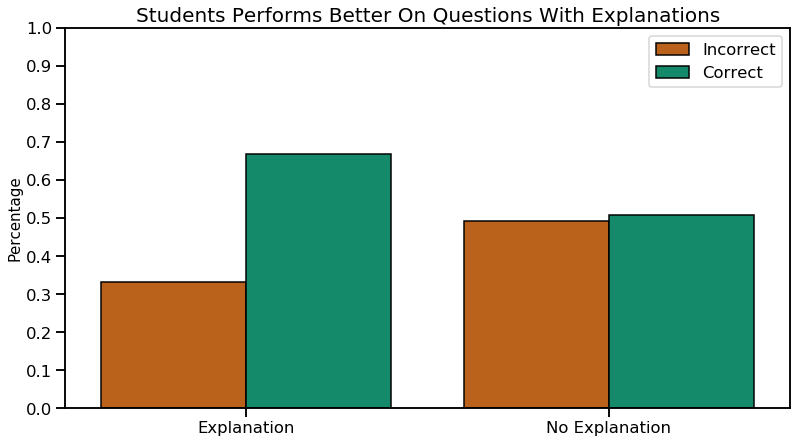

In [18]:
# Function to create plot 
# Plot displays how students perform on questions with and without explanations
explore.question_explanation_graph(train) 

- Users perform better on questions with explanations, than questions without explanations. 
    - A possible reason for this could be that the guidance from the explanations are actually helpful. 

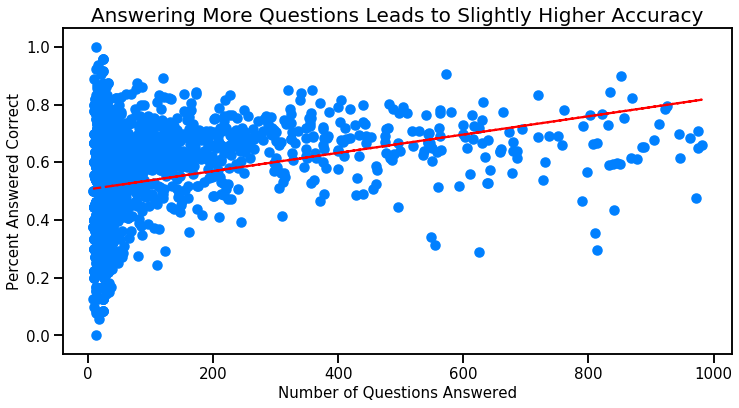

In [19]:
# Percent of Questions Answered Correct vs. Number of Questions Answered Per User
user_percent = df_train[df_train.answered_correctly != -1].groupby('user_id')['answered_correctly'].agg(Mean='mean', Answers='count')
user_percent = user_percent.query('Answers <= 1000')

fig = plt.figure(figsize=(12,6))
x = user_percent.Answers
y = user_percent.Mean
plt.scatter(x, y, marker='o',color='#0080ff')
plt.title("Answering More Questions Leads to Slightly Higher Accuracy", fontsize=20)
plt.xlabel("Number of Questions Answered", fontsize=15)
plt.ylabel("Percent Answered Correct", fontsize=15)
plt.xticks(rotation=0, fontsize=15)
plt.yticks(rotation=0, fontsize=15)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

plt.show() 

- There is a slight positive linear trend for the relationship between percentage answered correct and the number of the questions answered. 

- Most users answer less than 200 question on average. 

# Hypothesis Testing

## Hypothesis Test 1

### General Inquiry
<br>
Does a student receiving an explanation prior to a question have a connection with whether or not they'll answer it correctly?

### Chi-Squared Test

$H$0: question_had_explanation and answered_correctly are independent
<br>
$H$a: question_had_explanation and answered_correctly are dependant

In [20]:
# Creating crosstab of data reflecting if question was answered correctly and if it had an explanation.
observed_pqhe = pd.crosstab(train.answered_correctly, 
                            train.question_had_explanation)

# Displaying crosstab
observed_pqhe

question_had_explanation,0,1
answered_correctly,,
0,21210,119596
1,21974,240597


In [21]:
# Calculating chi^2, p value, degrees of freedom and expected values
chi2, p, degf, expected = stats.chi2_contingency(observed_pqhe)

# Printing results
print('alpha = .05\n')
print(f'p = {p:.4f}')

alpha = .05

p = 0.0000


- P is less than alpha so we <b>reject</b> the null hypothesis that answered_correctly and question_had_explanation are independent

## Hypothesis Test 2

### General Inquiry
<br>
Is there a linear relationship between the average time it takes a user to answer a question and their average accuracy?

### Pearson Correlation Test

$H$0: There is no linear relationship between avg_user_q_time and user_acc_mean
<br>
$H$a: There is a linear relationship between avg_user_q_time and user_acc_mean

In [22]:
# Performing pearson correlation test
r, p = stats.pearsonr(train.avg_user_q_time, train.user_acc_mean)

# Displaying alpha and test results
print("alpha = .05\n")
print("r correlation coefficient", r)
print("p value                   ", p)

alpha = .05

r correlation coefficient -0.053798627856180434
p value                    3.0491148951959335e-256


- P is less than alpha so we <b>reject</b> the null hypothesis that there is no linear relationship between avg_user_q_time and user_acc_mean.

- Given the r correlation coefficient of -.05, we see that there is an extremely weak inverse linear relationship between the variables.

- Although the relationship between these variables is weak, it was still worth exploring because to needed to see the correlation between these variables. 

## Hypothesis Test 3

### General Inquiry
<br>
Does the time it takes users with high accuracy to answer difficult questions differ from the time it takes other users to answer difficult questions?

### Two-Sample Two-Tailed T-Test
$H$0: The avg time that users with above avg accuracy spend on questions with below avg content accuracy is equal to the avg time that users with avg or below accuracy spend on them.
<br><br>
$H$a: The avg time that users with above avg accuracy spend on questions with below avg content accuracy is not equal to the avg time that users with avg or below accuracy spend on them.

In [23]:
# Creating df of all questions that had less than average mean_content_accuracy
# ie. all questions that users answered incorrectly more often than average
hard_questions = train[train.mean_content_accuracy < train.mean_content_accuracy.mean()]

# Filtering DF above for all users with above avg accuracy
hi_acc_users = hard_questions[hard_questions.user_acc_mean > hard_questions.user_acc_mean.mean()]

# Filtering DF above for all users with avg or below accuracy
low_acc_users = hard_questions[hard_questions.user_acc_mean <= hard_questions.user_acc_mean.mean()]

In [24]:
# Performing two sample, two tailed t-test
t, p = stats.ttest_ind(hi_acc_users.q_time, low_acc_users.q_time, equal_var = False)

# Printing results
print('alpha = .05\n')
print("test statistic   ", t)
print("p value           ", p)

alpha = .05

test statistic    -2.4486883290862065
p value            0.014338813349406287


- P is less than alpha so we <b>reject</b> the null hypothesis. 
- The sub-alpha p value and negative test statistic suggest that users with higher accuracy spend less time on difficult questions than others. 
    - The explanation for this might be that many high accuracy users are more well prepared for difficult questions than others and not that they are spending more time on hard questions to improve their performance.

## Hypothesis Test 4

### General Hypothesis
<br>
Is their a linear relationship between the amount of lectures a user has viewed and their task performance? Task performance is measured by a users overall performance on each bundle of questions. A bundle can contain 1 or more questions.

### Pearson Correlation Test

$H$0: There is no linear relationship between user_lectures_running_total and mean_task_accuracy
<br>
$H$a: There is a linear relationship between user_lectures_running_total and mean_task_accuracy

In [25]:
# performing pearson correlation test
r, p = stats.pearsonr(train.user_lectures_running_total, train.mean_task_accuracy)

# printing alpha and results
print("alpha = .05\n")
print("r correlation coefficient", r)
print("p value                  ", p)

alpha = .05

r correlation coefficient 0.20740509858727074
p value                   0.0


- Since p is less than alpha we will <b>reject</b> the null hypothesis that there is no linear relationship between mean_task_accuracy and user_lectures_running_total.    



- The r correlation coefficient of .207 indicates that there is a weak linear relationship between these variables.
    - As the amount of lectures that a user has seen increases, so does their task accuracy on average.
    - Viewing lectures may be having a positive, albeit weak impact on user performance.

## Feature Selection

### Seperate the Features and Target

In [26]:
# Creating train, validate, test DFs that only include non-target variables
X_train = train_s.drop(columns='answered_correctly')
y_train = train_s['answered_correctly']

X_validate = validate_s.drop(columns='answered_correctly')
y_validate = validate_s['answered_correctly']

X_test = test_s.drop(columns='answered_correctly')
y_test = test_s['answered_correctly']

In [27]:
# Display the X_train
X_train.head(3)

,question_had_explanation,user_acc_mean,mean_content_accuracy,mean_task_accuracy,user_lectures_running_total_scaled,avg_user_q_time_scaled
0,0,0.630049,0.818182,0.682248,0.0,0.001202
1,0,0.630049,0.550000,0.534988,0.0,0.001202
2,0,0.630049,0.444444,0.445216,0.0,0.001202


In [28]:
# Display the y_train
y_train.head(3)

0    1
1    0
2    1
Name: answered_correctly, dtype: int64

## Select Top 5 Features by Select K Best

In [29]:
# Compute the top 5 features
f_features = explore.KBest_ranker(X_train, y_train, 5)

# Print the top 5 features
f_features

['question_had_explanation',
 'user_acc_mean',
 'mean_content_accuracy',
 'mean_task_accuracy',
 'user_lectures_running_total_scaled']

## Select Top 5 Features by Recursive Feature Elimination (RFE)

In [30]:
# Using function from explore.py to rank using RFE
rfe_ranker(train_s).head(5)

,Feature,Rank
2,mean_content_accuracy,1
1,user_acc_mean,2
3,mean_task_accuracy,3
5,avg_user_q_time_scaled,4
0,question_had_explanation,5


### Explore Takeaways
### Graphs:
- Most users leave after first week.
- In general, most questions are answered correctly. 
- Questions that have explanations are more likely to be answered correctly. 
- Answering more questions leads to slight higher accuracy for students.      
    
### Hypothesis Testing:
<br>
<b>Hypothesis 1:</b> Chi^2 test results show that a question having an explanation and the question being answered correctly are dependant.
<br>
<br>
<b>Hypothesis 2:</b> Pearson correlation test results reflect that there is an extremely weak inverse linear relationship between the average time a user spends on question and their average accuracy. 
<br>
<br>
<b>Hypothesis 3:</b> Two-sample two-tailed t-test results suggest that there is a difference in the average time that high accuracy users spend on hard questions and the time that other users spend on hard questions.   
<br>
<br>
<b>Hypothesis 4:</b> Pearson correlation test results reflect that there is a weak linear relationship between average task accuracy and the amount of lectures a user has viewed.     
<br>

### Feature Selection:
The top 4 features that __Select K Best__ and __RFE__ rankers found in common were:
- mean_content_accuracy
- user_acc_mean
- mean_task_accuracy
- prior_question_had_explanation

# 4. Modeling<a id='modeling'></a>
Create baseline and alternate models that will predict if a student answers a question correctly. 

[Return to Top](#toc)
***

## Compute the AUC score of the baseline

### Use the randomly generated classes as the baseline

In [31]:
# Compute the size of y_train
size = y_train.size

# Construct y_baseline
y_baseline_random = np.random.randint(2, size=size)

# Print the y_baseline
y_baseline_random

array([0, 1, 1, ..., 1, 0, 1])

In [32]:
# Compute the AUC score 
roc_auc_score(y_train, y_baseline_random)

0.500980258055526

### Use the most frequent class as the baseline

In [33]:
# Compute the most frequent class
y_train.value_counts(normalize=True)

1    0.650932
0    0.349068
Name: answered_correctly, dtype: float64

In [34]:
# Construct the y_baseline_frequency
y_baseline_frequency = np.array([1]*size)

# Check the baseline values
y_baseline_frequency

array([1, 1, 1, ..., 1, 1, 1])

In [35]:
# Compute the AUC score 
roc_auc_score(y_train, y_baseline_frequency)

0.5

**Baseline Results**
1. Two methods (randomly generated class and most frequent class) were used to generate the baseline values.
2. The baseline AUC score is 0.5 regardless of the chosen methods.

## Model the train/validate/test using various classification algorithms

In [36]:
# Create a list of names of the classifiers
# Make sure all the classifiers have the method: predict_proba
names = ['LogisticRegression',
         'Decision Tree',
         'Random Forest',
         'Ada Boost',
         'Gradient Boost',
         'Nearest Neighbors',
         'Naive Bayes',
         'Neural Net'
        ]

In [37]:
# Create a list of classifiers
classifiers = [LogisticRegression(), 
               DecisionTreeClassifier(max_depth=3),
               RandomForestClassifier(max_depth=3),
               AdaBoostClassifier(),
               GradientBoostingClassifier(),
               KNeighborsClassifier(3),
               GaussianNB(), 
               MLPClassifier() 
              ]

In [38]:
# Sanity check: the size between the two should be the same
len(names) == len(classifiers)

True

In [39]:
# Use the classifiers created above to model the train, validate and test
metrics = model.model_multiple_algos(names, classifiers, 
                                     X_train, y_train, 
                                     X_validate, y_validate, 
                                     X_test, y_test)

Currently running on model LogisticRegression
LogisticRegression has completed
Currently running on model Decision Tree
Decision Tree has completed
Currently running on model Random Forest
Random Forest has completed
Currently running on model Ada Boost
Ada Boost has completed
Currently running on model Gradient Boost
Gradient Boost has completed
Currently running on model Nearest Neighbors
Nearest Neighbors has completed
Currently running on model Naive Bayes
Naive Bayes has completed
Currently running on model Neural Net
Neural Net has completed


In [40]:
# Rank the auc scores on test dataset in the descending order
mask = (metrics.dataset == 'test')
metrics[mask].sort_values(by="AUC score", ascending=False)

,AUC score,Algo,dataset
8,0.692036,Random Forest,test
2,0.691238,LogisticRegression,test
23,0.687428,Neural Net,test
14,0.686307,Gradient Boost,test
11,0.678628,Ada Boost,test
20,0.676666,Naive Bayes,test
5,0.675218,Decision Tree,test
17,0.626234,Nearest Neighbors,test


**Modeling Results**
- The highest AUC score on the test dataset is produced by Random Forest.
- The AUC score from the top model is 0.6918.
- The AUC score for the baseline is 0.5000.
- The top model surpassed the baseline by 0.1918, which is a 38% improvement (which is a comparison of the difference between the scores divided by the baseline).

### Plot the ROC curve on the top model

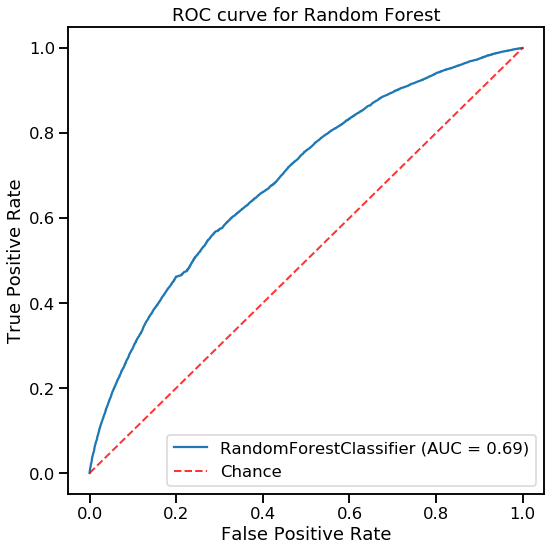

In [41]:
# Create the lr object and fit on train
lr = RandomForestClassifier(max_depth=3)
lr = lr.fit(X_train, y_train)

# Plot the ROC curve on test
model.auc_curve_plot1(lr, "Random Forest", X_test, y_test)

### Modeling Takeaways
- <b>Baseline:</b> 0.5 AUC Score  


- <b>Top 3 performing models: (results are from the test set)</b> 
    - Random Forest: 0.691864   
    - Logistic Regression: 0.691238
    - Neural Net: 0.688149    
    
    

- <b>Features used on all models:</b>
    - mean_content_accuracy
    - user_acc_mean
    - mean_task_accuracy
    - question_had_explanation
    - user_lectures_running_total
    - avg_user_q_time

# 5. Conclusions<a id='conclusions'></a>
Summary of data science pipeline takeaways and results.

[Return to Top](#toc)
***

### Acquire: 
- Data initially acquired from Kaggle and saved as local files: lectures.csv, questions.csv, and train.csv.
- Imported data from saved local files.

### Prepare: 
- Filled missing values with appropriate values varying according to column.
- Dropped columns that were not needed. 
- Dropped rows that represent lectures.
- Converted True and False values to 1's and 0's, respectively.
- Created scaled versions of the train, validate and test sets.
- Added feature engineering columns.

### Explore: 

__Graphs:__
- Most users leave after first week.
<br>
- Most questions are answered correctly.
<br>
- Questions that have explanations are more likely to be answered correctly.
<br>
- Answering more questions leads to slight higher accuracy for students.

__Hypothesis Testing:__

- Hypothesis 1: Chi^2 test results show that a question having an explanation and the question being answered correctly are dependant. 

- Hypothesis 2: Pearson correlation test results reflect that there is an extremely weak inverse linear relationship between the average time a user spends on question and their average accuracy. 

- Hypothesis 3: Two-sample two-tailed t-test results suggest that there is a difference in the average time that high accuracy users spend on hard questions and the time that other users spend on hard questions. 

- Hypothesis 4: Pearson correlation test results reflect that there is a weak linear relationship between average task accuracy and the amount of lectures a user has viewed. 

__Feature Selection:__
The top 4 features that Select K Best and RFE rankers found in common were:
- mean_content_accuracy
- user_acc_mean
- mean_task_accuracy
- prior_question_had_explanation (renamed to 'question_had_explanation')

### Modeling: 

__Overall:__ 
- The highest AUC score on the test dataset is produced by Random Forest.
- The top model surpassed the baseline by 0.1918, which is a 38% improvement (which is a comparison of the difference between the scores divided by the baseline).

__Recommendations:__
- Riiid should provide more questions with explanations for students. 
- Focus on improving user engagement after the first week to increase user retention. 
- Using our project, Riiid can assess: 
    - ... question difficulty level based on population performance (mean_content_accuracy and mean_task_accuracy).
    - ... an individual's performance based on their personal performance (user_acc_mean). 
    - ... how time spent on a question reflects on a student's accuracy (avg_user_q_time_scaled). 

- Using our model, Riiid can predict future performance of current students. 

__Expectations:__
- Providing more explanations could improve overall answer accuracy. 
- Increasing user retention would provide a better representation of student long-term performance. 


### Future Investigations
- Use this predictive model on Riiid's other educational programs. 
- Explore more features and different modeling like xgboost and lightlgbm.
- Improve model to predict new student performance. 